<a href="https://colab.research.google.com/github/48856035/Gemini-Python-API/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 隨機產生 50 位顧客資料
np.random.seed(42)
num_customers = 50

df = pd.DataFrame({
    'customer_id': [f'C{i:02d}' for i in range(1, num_customers + 1)],
    'annual_spending': np.random.randint(500, 15000, size=num_customers),
    'purchase_frequency': np.random.randint(1, 20, size=num_customers),
    'customer_age': np.random.randint(18, 65, size=num_customers),
    'membership_years': np.random.randint(1, 10, size=num_customers),
    'preferred_category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Furniture'], num_customers)
})

print(df.head())



  customer_id  annual_spending  purchase_frequency  customer_age  \
0         C01             7770                   3            41   
1         C02             1360                   5            18   
2         C03             5890                  19            61   
3         C04            13918                   7            25   
4         C05             5691                   9            41   

   membership_years preferred_category  
0                 7           Clothing  
1                 1           Clothing  
2                 4          Furniture  
3                 4           Clothing  
4                 5               Food  


In [28]:
# 選擇數值型欄位
numerical_cols = ['annual_spending', 'purchase_frequency', 'customer_age', 'membership_years']

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

print("標準化完成")



標準化完成


<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 32920 (\N{CJK UNIFIED IDEOGRAPH-8098}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 21063 (\N{CJK UNIFIED IDEOGRAPH-5247}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-f3f5bdd75b69>:28: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing fro

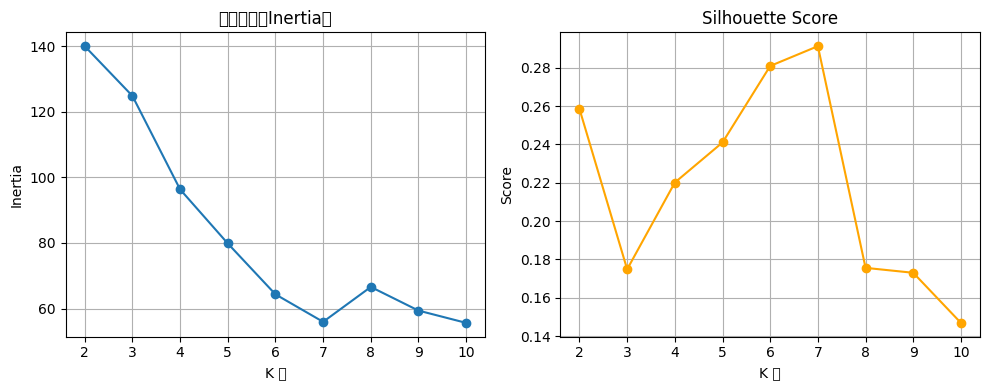

根據 Silhouette Score，最佳 K 值為：7


In [34]:
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Elbow
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("肘部法則（Inertia）")
plt.xlabel("K 值")
plt.ylabel("Inertia")
plt.grid(True)

# Plot Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("K 值")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# 自動選出最佳 K 值
optimal_k = k_range[np.argmax(sil_scores)]
print(f"根據 Silhouette Score，最佳 K 值為：{optimal_k}")



In [33]:
# 聚類分析
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# 各群組的平均值
group_summary = df.groupby('cluster')[numerical_cols].mean()
print("各群組特徵平均值：")
print(group_summary)

# 說明
print("解釋：")
for cluster in group_summary.index:
    print(f"\n群組 {cluster} 特徵：")
    print(group_summary.loc[cluster])


各群組特徵平均值：
         annual_spending  purchase_frequency  customer_age  membership_years
cluster                                                                     
0            3868.200000           13.400000     32.000000          7.600000
1            9682.750000           14.625000     56.750000          7.375000
2            3808.625000            7.250000     24.125000          1.750000
3           13039.833333            5.666667     51.000000          4.000000
4            5993.888889            4.444444     45.666667          6.666667
5            2355.428571           15.285714     45.857143          1.857143
6           11081.000000           12.714286     27.285714          5.857143
解釋：

群組 0 特徵：
annual_spending       3868.2
purchase_frequency      13.4
customer_age            32.0
membership_years         7.6
Name: 0, dtype: float64

群組 1 特徵：
annual_spending       9682.750
purchase_frequency      14.625
customer_age            56.750
membership_years         7.375
Name: 1, 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39015 (\N{CJK UNIFIED IDEOGRAPH-9867}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39636 (\N{CJK UNIFIED IDEOGRAPH-9AD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas

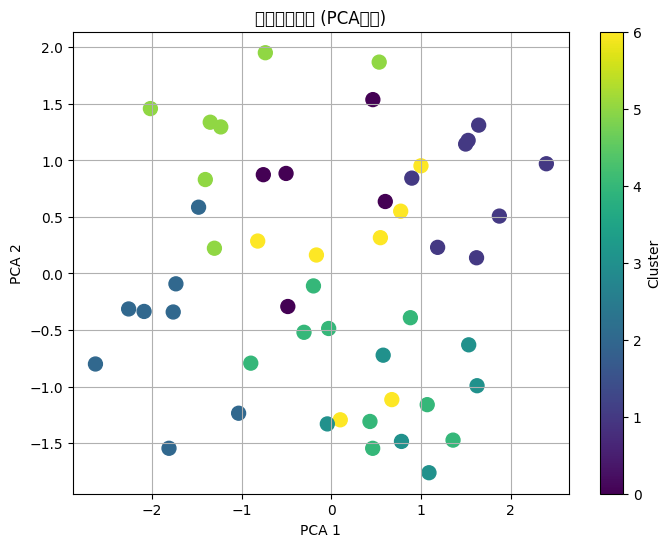

這張圖是經過 PCA 降維後的群體分佈圖，每個顏色代表一個群體。可以看到不同群體之間的相對分布與差異，讓我們直觀了解顧客的分群結果。


In [32]:
# 降維
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

# 繪圖
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='viridis', s=100)
plt.title("顧客群體分佈 (PCA降維)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# 解釋
print("這張圖是經過 PCA 降維後的群體分佈圖，每個顏色代表一個群體。可以看到不同群體之間的相對分布與差異，讓我們直觀了解顧客的分群結果。")

